In [2]:
from datasets import load_titanic, balance_classes
from tools import model_performance, confusion_matrix
from sklearn.metrics import plot_roc_curve
import pandas as pd

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_val_score

In [3]:
df, df_train, df_test = load_titanic()
df_train.columns

Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'target'], dtype='object')

In [4]:
original_X = df.drop(['target'], axis=1)
original_y = df['target']
train_X = df_train.drop(['target'], axis=1)
train_y = df_train['target']
test_X = df_test.drop(['target'], axis=1)
test_y = df_test['target']

In [5]:
original_X = pd.get_dummies(original_X)
train_X = pd.get_dummies(train_X)
test_X = pd.get_dummies(test_X)

features = train_X.columns

In [6]:
scaler = StandardScaler().fit(train_X)
original_X = scaler.transform(original_X)
train_X = scaler.transform(train_X)
test_X = scaler.transform(test_X)

original_X = pd.DataFrame(original_X, columns=features)
train_X = pd.DataFrame(train_X, columns=features)
test_X = pd.DataFrame(test_X, columns=features)

In [7]:
train_X.columns

Index(['pclass', 'age', 'sibsp', 'parch', 'fare', 'sex_female', 'sex_male',
       'embarked_C', 'embarked_Q', 'embarked_S'],
      dtype='object')

In [10]:
cross_val_score(QuadraticDiscriminantAnalysis(), original_X.drop(['sex_female', 'embarked_Q'], axis=1), original_y).mean()

0.7946142740568704

In [11]:
model = QuadraticDiscriminantAnalysis()
model.fit(train_X.drop(['sex_female', 'embarked_Q'], axis=1), train_y)

QuadraticDiscriminantAnalysis()

In [12]:
model_performance(model, train_X.drop(['sex_female', 'embarked_Q'], axis=1), train_y, test_X.drop(['sex_female', 'embarked_Q'], axis=1), test_y)

Train score
0.8876404494382022
Test score
0.7769985974754559


In [13]:
confusion_matrix(model.predict(train_X.drop(['sex_female', 'embarked_Q'], axis=1)), train_y, model.predict(test_X.drop(['sex_female', 'embarked_Q'], axis=1)), test_y)

Train
TN: 89, TP: 69, FN: 10, FP: 10
Test
TN: 369, TP: 185, FN: 78, FP: 81


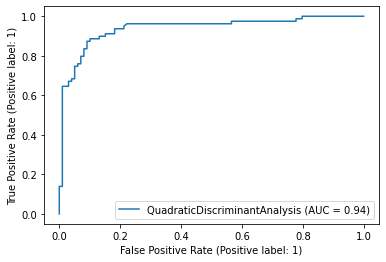

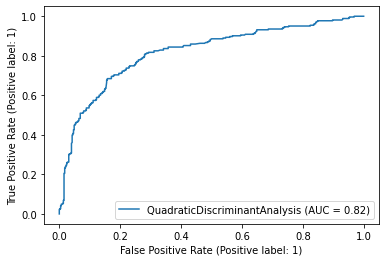

In [14]:
plot_roc_curve(model, train_X.drop(['sex_female', 'embarked_Q'], axis=1), train_y)
plot_roc_curve(model, test_X.drop(['sex_female', 'embarked_Q'], axis=1), test_y)